In [299]:
import json
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [300]:
#your file path here!
files= os.listdir('Searches')
del files[0]

searches =[]
dates = []
for file in files:
    with open('Searches/%s'%(file)) as json_data:
        d = json.load(json_data)
    for i in range(len(d['event'])):
        for j in range(len((d['event'][i][u'query'][u'id']))):
            searches.append(d['event'][i][u'query'][u'query_text']) 
            dates.append(d['event'][i][u'query'][u'id'][j][u'timestamp_usec'])

dates = [datetime.datetime.fromtimestamp(int(i)/1000000).strftime('%Y-%m-%d %H:%M:%S') for i in dates]
searches = [i.encode('utf-8') for i in searches]

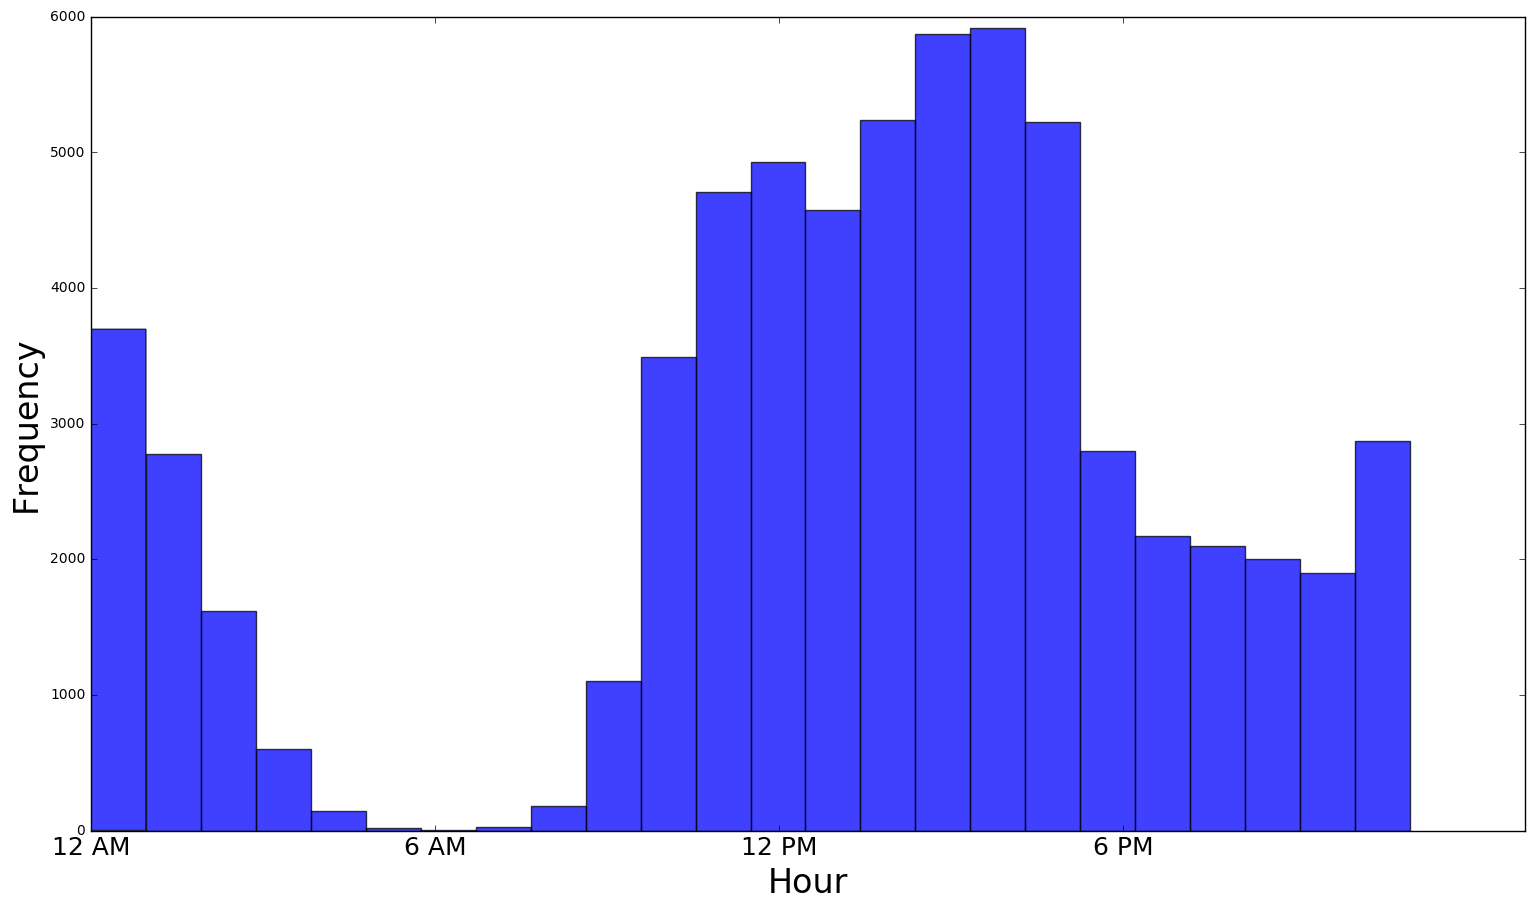

In [301]:
hours = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').hour for i in dates]
n, bins, patches = plt.hist(hours, 24, facecolor='blue', alpha=0.75)
plt.xticks([0,6,12,18], ['12 AM','6 AM', '12 PM', '6 PM'], fontsize=18)
plt.xlabel('Hour', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

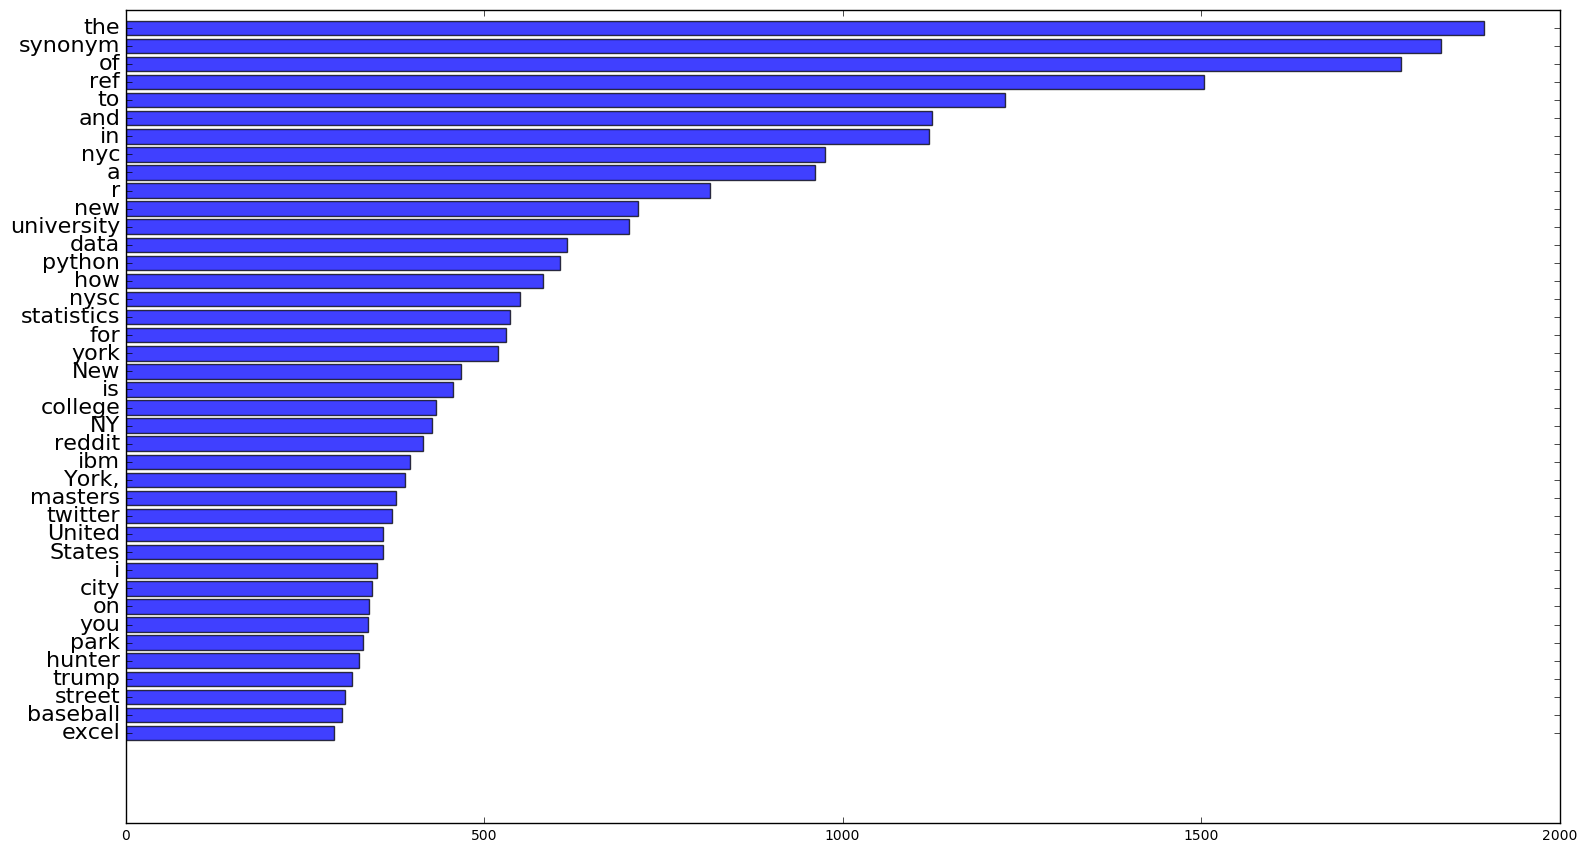

In [302]:
combo = ' '.join(searches)
freqs = Counter(combo.split())
top = freqs.most_common(40)

words = []
counts = []
for i in range(40):
    words.append(top[i][0])
    counts.append(top[i][1])

words.reverse()
counts.reverse()

plt.barh(range(40), freq, align='center', color='b', alpha=0.75)
plt.yticks(range(40), words, fontsize=16)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [303]:
d = {"search": searches,
    "time": dates}

googled = pd.DataFrame(d)

In [304]:
dt = datetime.datetime(2014, 10, 1)
end = datetime.datetime(2017, 3, 5)
step = datetime.timedelta(days=7)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

In [305]:
trump_weeks = []
warriors_weeks = []
python_weeks = []
ibm_weeks = []

for i in range(len(result)-1):
    trump_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('trump'))))
    warriors_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('warriors'))))
    python_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('python'))))
    masters_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('master'))))
    ibm_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('ibm'))))

In [306]:
term = len(trump_weeks)-1

trump_weeks_smooth = [(trump_weeks[i] + trump_weeks[i-1] +trump_weeks[i+1])/3 for i in range(1, term)]
trump_weeks_smooth_norm = [i/float(max(trump_weeks_smooth)) for i in trump_weeks_smooth]

python_weeks_smooth = [(python_weeks[i] + python_weeks[i-1] +python_weeks[i+1])/3 for i in range(1, term)]
python_weeks_smooth_norm = [i/float(max(python_weeks_smooth)) for i in python_weeks_smooth]

ibm_weeks_smooth = [(ibm_weeks[i] + ibm_weeks[i-1] + ibm_weeks[i+1])/3 for i in range(1, term)]
ibm_weeks_smooth_norm = [i/float(max(ibm_weeks_smooth)) for i in ibm_weeks_smooth]

warriors_weeks_smooth = [(warriors_weeks[i] + warriors_weeks[i-1] + warriors_weeks[i+1])/3 for i in range(1, term)]
warriors_weeks_smooth_norm = [i/float(max(warriors_weeks_smooth)) for i in warriors_weeks_smooth]

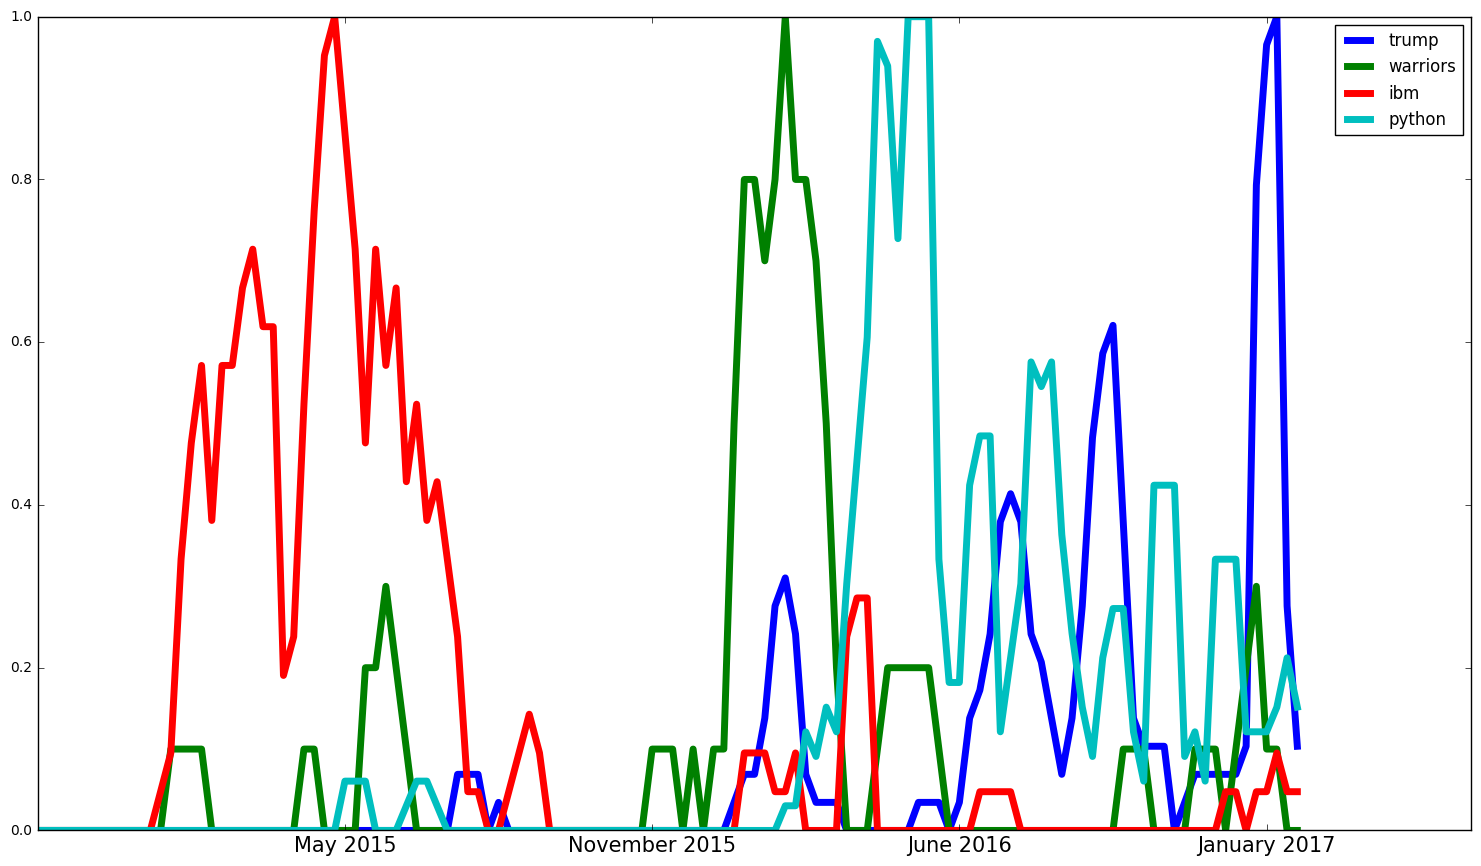

In [307]:
plt.plot(range(term-1), trump_weeks_smooth_norm, label='trump', linewidth=5.0)
plt.plot(range(term-1), warriors_weeks_smooth_norm, label='warriors', linewidth=5.0)
plt.plot(range(term-1), ibm_weeks_smooth_norm, label='ibm', linewidth=5.0)
plt.plot(range(term-1), python_weeks_smooth_norm, label='python', linewidth=5.0)
plt.xticks([30,60,90,120], ['May 2015','November 2015', 'June 2016', 'January 2017'], fontsize=15)
plt.legend()

plt.gcf().set_size_inches(18.5, 10.5, forward=True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()